In [3]:
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
from metpy.cbook import get_test_data
import numpy as np

In [4]:
data = xr.open_dataset('air.mon.ltm.nc')
data


/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Created 2022/01/11 by doMonthLTMNC4
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...

In [5]:
data_var = data.metpy.parse_cf('air')
data_var

<xarray.DataArray 'air' (time: 12, level: 17, lat: 73, lon: 144)>
[2144448 values with dtype=float32]
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
    metpy_crs  object Projection: latitude_longitude
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

reading latitudes and longitudes

In [6]:
y = data_var.lat    # y-axis as latitude 
x = data_var.lon    # x-axis as longitude

In [7]:
im_data = data_var.isel(time=0).sel(level=100)
im_data


<xarray.DataArray 'air' (lat: 73, lon: 144)>
[10512 values with dtype=float32]
Coordinates:
    level      float32 100.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time       object 0001-01-01 00:00:00
    metpy_crs  object Projection: latitude_longitude
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

plotting the data

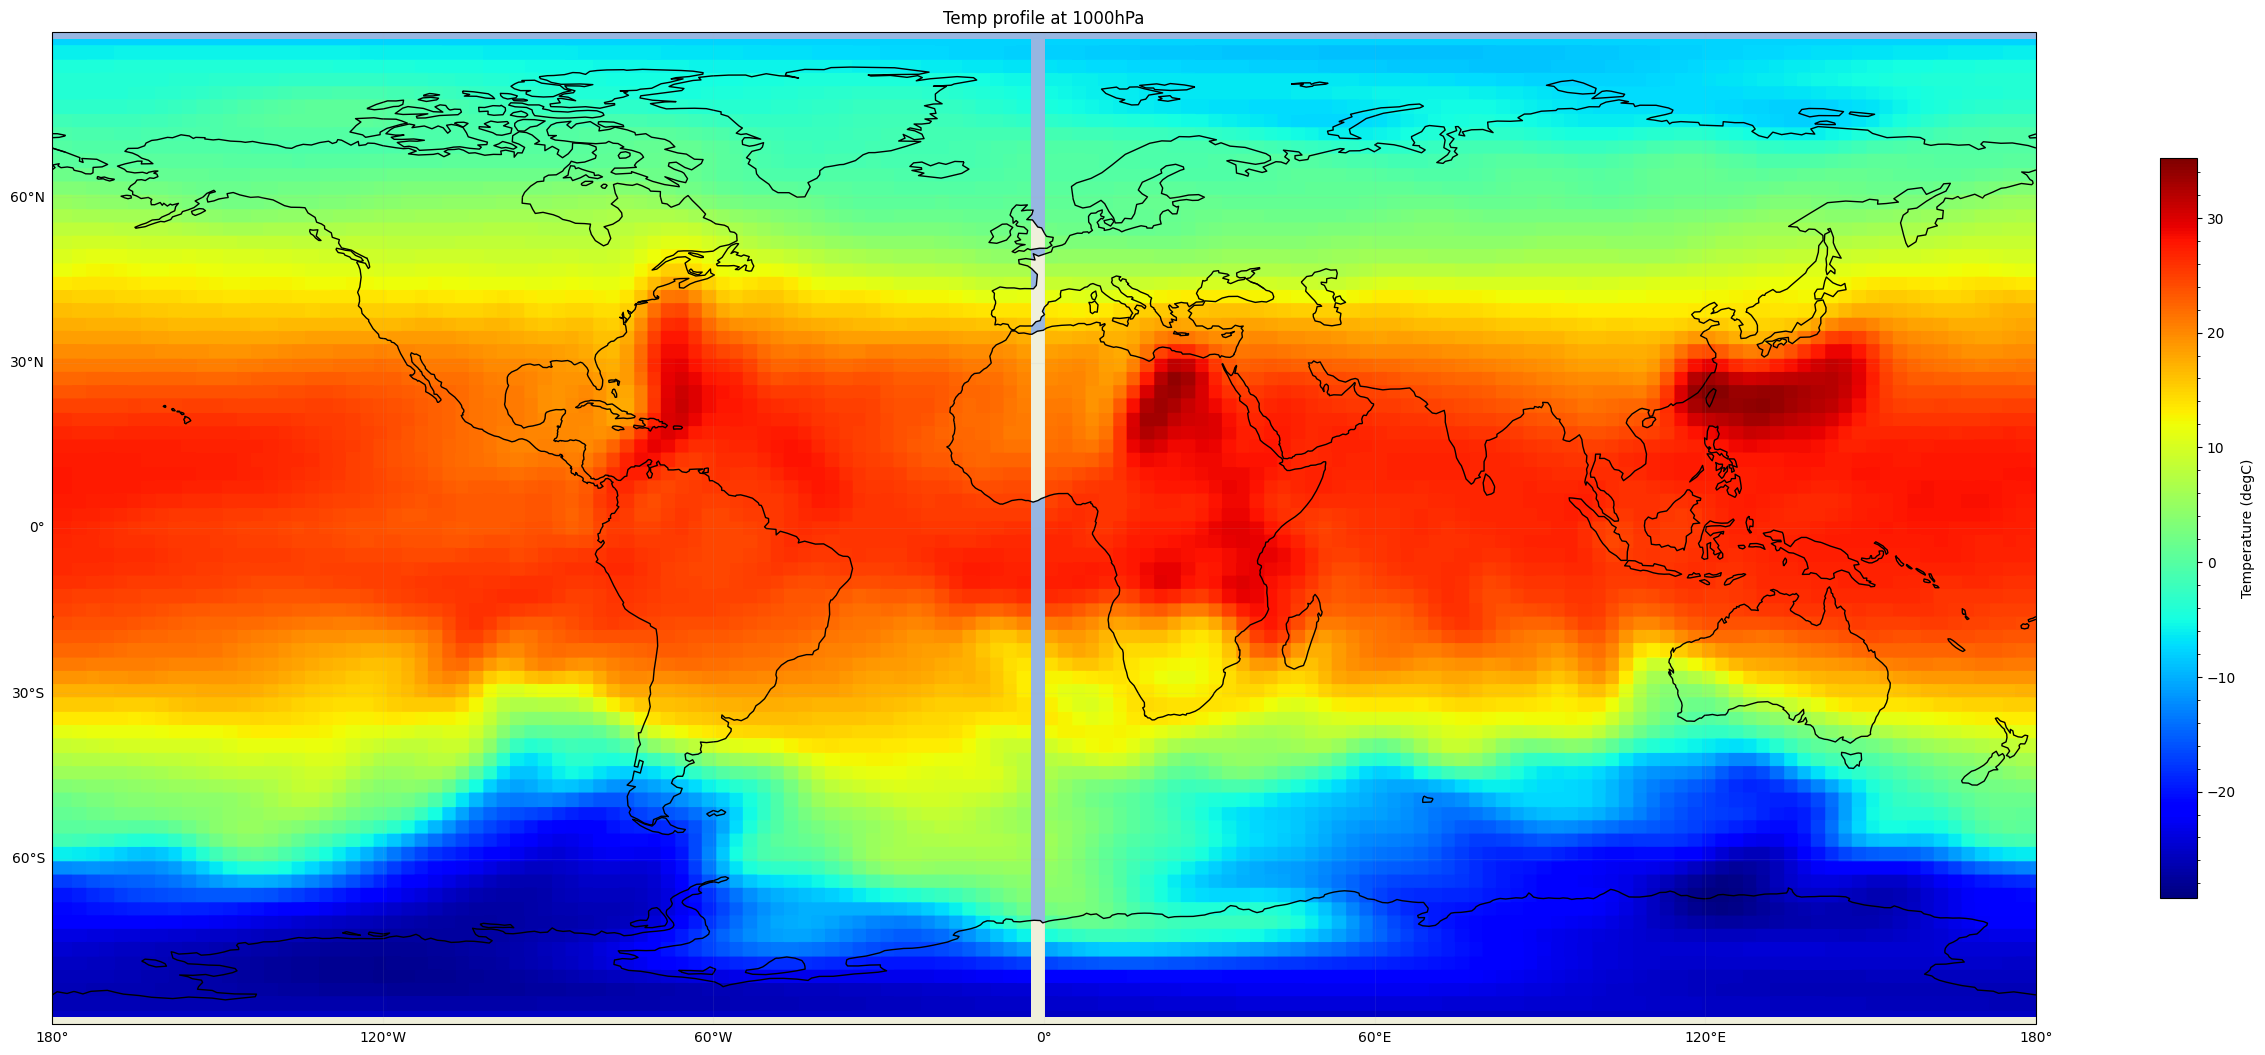

In [17]:
im_data = data_var.isel(time=0).sel(level=1000)
im_data

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(im_data-273.5,extent=(x.min(),x.max(),y.min(),y.max()),cmap='jet',origin='lower')
plt.title('Temp profile at 1000hPa')
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='blue')
# ax.add_feature(states_provinces, edgecolor='blue')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Temperature (degC)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig("long_term_mean.png",dpi=330)


creating plots at different levels

In [9]:
levels = data['level']

for i in range(len(levels)):
    print(levels[i].values)

1000.0
925.0
850.0
700.0
600.0
500.0
400.0
300.0
250.0
200.0
150.0
100.0
70.0
50.0
30.0
20.0
10.0


Plotting all the profiles at different pressure levels

In [ ]:
for i in range(len(levels)):   
    im_data = data_var.isel(time=0).sel(level=levels[i].values)
    im_data

    fig = plt.figure(figsize=(32,32))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

    mp = ax.imshow(im_data-273.5,extent=(x.min(),x.max(),y.min(),y.max()),cmap='jet',origin='lower')
    plt.title('Temperature profile at '+str(levels[i].values)+' hPa')

    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='10m',
            facecolor='none')
    # ax.add_feature(cfeature.BORDERS,edgecolor='blue')
    # ax.add_feature(states_provinces, edgecolor='blue')

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.OCEAN)


    cbar = fig.colorbar(mp, shrink=0.3,label='Temperature (degC)')
    cbar.minorticks_on()

    #adding the long lat grids and enabling the tick labels
    gl = ax.gridlines(draw_labels=True,alpha=0.1)
    gl.top_labels = False
    gl.right_labels = False

    plt.savefig("plot"+str(levels[i].values)+"hPa.png",dpi=330)
    plt.clf()


<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>